In [69]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# import data 
data = pd.read_csv('ImprovedAirbnbCleaned.csv')
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Bronx                               int64
Brooklyn                            int64
Manhattan                           int64
Queens                              int64
Staten Island                       int64
days_since_last_review            float64
Entire home/apt                     int64
Private room                      

In [71]:
# drop columns that are not needed
data = data.drop(['id', 'host_id','room_type','neighbourhood_group'], axis=1).select_dtypes(exclude=['object'])

In [72]:
# drop rows with missing values
data = data.dropna()

PCA Results

In [73]:
from sklearn.decomposition import PCA # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
import numpy as np # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
df = data

X = df.drop('price', axis=1)
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_standardized = (X_train - X_train.mean()) / X_train.std()
X_test_standardized = (X_test - X_train.mean()) / X_train.std()
MSE_train_pcr_arr = np.ones(20)
MSE_test_pcr_arr = np.ones(20)

for i in range(1,21):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_standardized)
    X_test_pca = pca.fit_transform(X_test_standardized)

    # Fit the model
    model_pcr = LinearRegression()
    model_pcr.fit(X_train_pca, y_train)

    # get training MSE
    MSE_train_pcr = mean_squared_error(y_train, model_pcr.predict(X_train_pca))
    MSE_train_pcr_arr[i-1] = MSE_train_pcr
    # Get test MSE
    MSE_test_pcr = mean_squared_error(y_test, model_pcr.predict(X_test_pca))
    MSE_test_pcr_arr[i-1] = MSE_test_pcr

print("PCR Model with 1 to 20 Predictors:")

RMSE_train_pcr_arr = np.sqrt(MSE_train_pcr_arr)
RMSE_test_pcr_arr = np.sqrt(MSE_test_pcr_arr)
print("Training MSE:", RMSE_train_pcr_arr)
print("Test MSE:", RMSE_test_pcr_arr)



PCR Model with 1 to 20 Predictors:
Training MSE: [196.05368172 195.36934514 194.15481542 194.16636568 194.03600764
 194.04524156 193.56394837 193.47403608 193.42031839 193.38152144
 193.38114674 193.36628776 193.31536504 193.26018447 192.7380393
 192.40510878 191.89127857 191.6413121  191.21930373 191.20930332]
Test MSE: [193.98806199 192.90040341 191.91967078 191.91025928 191.89058658
 191.91115273 193.20333982 193.1792495  193.07748191 192.97165782
 192.97889283 193.02818815 192.91669374 193.18973932 193.08183924
 192.91903738 192.09364802 191.91907668 191.60146452 191.57703965]


In [ ]:
a = 5
RMSE_train_pcr_arr[a-1]

194.05874877220293

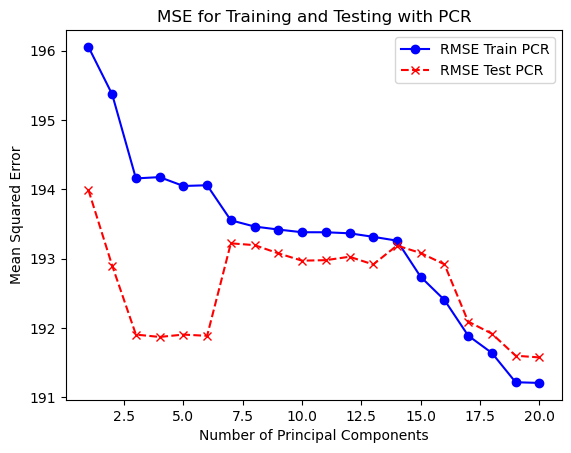

In [54]:
import matplotlib.pyplot as plt
import numpy as np

i = np.arange(1, 21)
plt.figure()
plt.plot(i, RMSE_train_pcr_arr, label='RMSE Train PCR', marker='o', linestyle='-', color='b')
plt.plot(i, RMSE_test_pcr_arr, label='RMSE Test PCR', marker='x', linestyle='--', color='r')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Training and Testing with PCR')
plt.show()


Boosting

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Define parameter grid
param_grid = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5,10]
}

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=123)

# Perform grid search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Fit model with best parameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=123)
best_gb_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = best_gb_model.predict(X_train)
# Calculate training MSE
train_mse = mean_squared_error(y_train, y_train_pred)

# Predict on test set
y_test_pred = best_gb_model.predict(X_test)
# Calculate test MSE
test_mse = mean_squared_error(y_test, y_test_pred)

print("Best parameters:", best_params)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training RMSE:", np.sqrt(train_mse))
print("Test RMSE:", np.sqrt(test_mse))

Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Training MSE: 19361.864434734394
Test MSE: 24868.01677607733
